<a href="https://colab.research.google.com/github/aReinoso007/Simulacion/blob/main/prueba_simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from datetime import datetime
from datetime import timedelta

# Cargar los datasets

In [582]:
poblaciones = pd.read_csv('/content/1.Poblaciones.csv', sep = ';', encoding='latin1', skiprows = 2)
sectorizacion_empleo = pd.read_csv('/content/4. Sectorización del empleo.csv', sep = ';',encoding='latin1', skiprows = 1)

# Proceso de limpieza del Dataset de Empleo y Desempleo
Se eliminan las columnas sin valores

In [583]:
#Limpieza
poblacionesClean = poblaciones.drop(poblaciones.columns[[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]], axis=1)
poblacionesClean.rename(columns = {
   'Unnamed: 0': 'Encuesta', 'Unnamed: 1': 'Periodo', 'Unnamed: 2': 'Indicadores'
}, inplace = True)


In [587]:
#Verificar que se asignaron bien los nombres de las columnas
for col in poblacionesClean.columns:
  print(col)

Encuesta
Periodo
Indicadores
Total
Urbana
Rural
Hombre
Mujer


## Asignar las ocurrencas de 'Empleo' y 'Desempleo'

In [148]:
# Ver todas las ocurrencias de 'Empleo' en la columna de indicadores
desmpleoDF = poblacionesClean.loc[poblacionesClean['Indicadores'] == 'Desempleo']
desmpleoDF.head()

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
12,ENEMDU,dic-07,Desempleo,316.697,256.662,60.036,144.918,171.780
30,ENEMDU,jun-08,Desempleo,344.143,282.489,61.654,151.283,192.860
48,ENEMDU,dic-08,Desempleo,380.026,317.011,63.015,165.296,214.730
66,ENEMDU,dic-09,Desempleo,423.802,347.068,76.734,201.625,222.177
84,ENEMDU,jun-10,Desempleo,408.318,338.652,69.666,194.691,213.628


In [149]:
#Asignar las ocurrencias de Empleo a un nuevo DF
empleoDf = poblacionesClean.loc[poblacionesClean['Indicadores'] == 'Empleo' ]

### Renombrar las columnas

In [ ]:
#Empleo
#Seleccionar los datos importantes
dfEmp = empleoDf[['Periodo', 'Total']]
#Cambiar el nombre de las columnas
dfEmp.rename(columns = {
   'Periodo': 'Fecha', 'Total': 'Empleo'}, inplace = True)

In [ ]:
#Desempleo
#Seleccionar los datos importantes
dfDesemp = desmpleoDF[['Periodo', 'Total']]
#Cambiar el nombre de las columnas
dfDesemp.rename(columns = {
   'Periodo': 'Fecha', 'Total': 'Desempleo'}, inplace = True)

# Transformar datos de String a Numeric y separar el mes del anio
La columna de total tiene datos que necesitan ser transformados a tipo numeric



*   Para los datos de empleo



In [ ]:
#Empleo
#Transformar de string a int, los valores de total de empleo
dfEmp['Empleo'] = dfEmp['Empleo'].str.replace('.','').astype(int)



1.   Para los datos de desempleo



In [ ]:
#Desempleo
#Transformar de string a int, los valores de total de empleo
dfDesemp['Desempleo'] = dfDesemp['Desempleo'].str.replace('.','').astype(int)
dfDesemp.head()



1.   Separar el mes y anio de Empleo



In [ ]:
# Hacer un split de la fecha por mes y anio
dfEmp[['Mes', 'Anio']] = dfEmp['Fecha'].str.split('-', expand=True)


In [132]:
dfEmp[['Mes','Anio','Empleo']].head()

,Mes,Anio,Empleo
4,dic,07,6019332
22,jun,08,6245225
40,dic,08,6005395
58,dic,09,6125135
76,jun,10,6174141




1.   Separar mes y anio de Desempleo



In [ ]:
# Hacer un split de la fecha por mes y anio
dfDesemp[['Mes', 'Anio']] = dfDesemp['Fecha'].str.split('-', expand=True)

In [161]:
dfDesemp[['Mes','Anio','Desempleo']].head()

,Mes,Anio,Desempleo
12,dic,07,316697
30,jun,08,344143
48,dic,08,380026
66,dic,09,423802
84,jun,10,408318


# Graficas de Empleo y Desempleo por anio

Esta parte sirve para verificar que el merge haya sido exitoso

In [225]:
anioEmp = dfEmp.loc[dfEmp['Anio'] == '07' ]
anioEmp.head()

,Fecha,Empleo,Mes,Anio
4,dic-07,6019332,dic,07


In [224]:
anioDesmp = dfDesemp.loc[dfDesemp['Anio'] == '07' ]
anioDesmp.head()

,Fecha,Desempleo,Mes,Anio
12,dic-07,316697,dic,07


# Unir los dos dataframes

In [234]:
dfMerge = pd.merge(dfEmp, dfDesemp, on=['Fecha','Anio', 'Mes'])
dfMerge[['Mes','Anio','Empleo', 'Desempleo']].head()

,Mes,Anio,Empleo,Desempleo
0,dic,07,6019332,316697
1,jun,08,6245225,344143
2,dic,08,6005395,380026
3,dic,09,6125135,423802
4,jun,10,6174141,408318


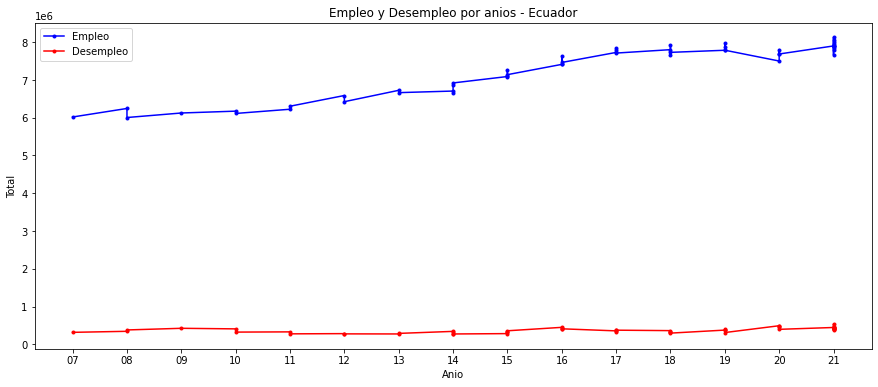

In [250]:
plt.figure(figsize=(15, 6))
plt.title('Empleo y Desempleo por anios - Ecuador')
plt.plot(dfMerge.Anio, dfMerge.Empleo, 'b.-')
plt.plot(dfMerge.Anio, dfMerge.Desempleo, 'r.-')
plt.xlabel('Anio')
plt.ylabel('Total')
plt.legend(['Empleo','Desempleo'])
plt.show()

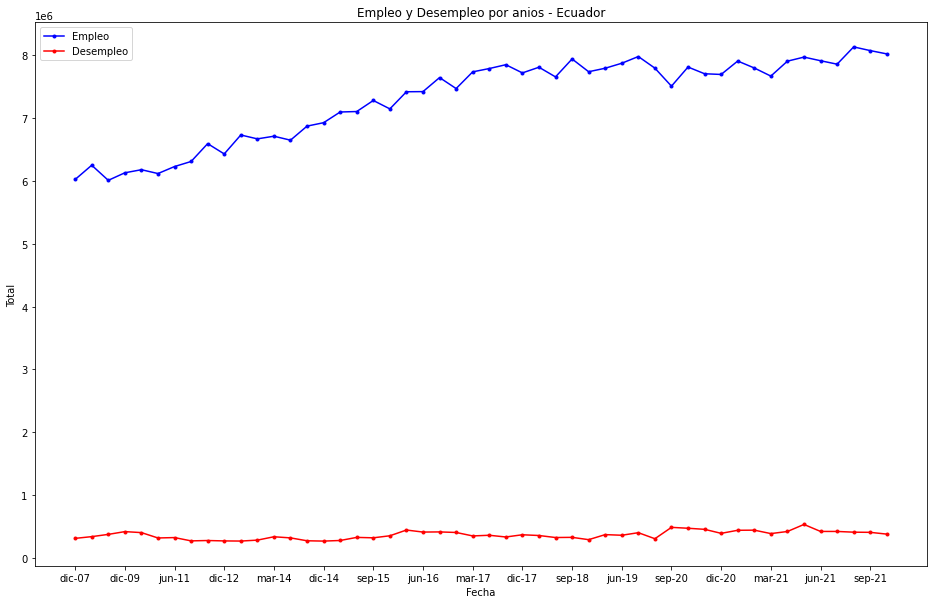

In [251]:
plt.figure(figsize=(16, 10))
plt.title('Empleo y Desempleo por anios - Ecuador')
plt.plot(dfMerge.Fecha, dfMerge.Empleo, 'b.-')
plt.plot(dfMerge.Fecha, dfMerge.Desempleo, 'r.-')
plt.xticks(dfMerge.Fecha[::3].tolist())
plt.xlabel('Fecha')
plt.ylabel('Total')
plt.legend(['Empleo','Desempleo'])
plt.show()

# Sectorizacion del Empleo
Crear un grafico de pie por personas


1.   Limpiar el dataset



In [544]:
sectorizacion_empleo.rename(columns = {
'Unnamed: 1': 'Sector'}, inplace = True)

sectorizacion = sectorizacion_empleo[sectorizacion_empleo['Característica'].notna()]


In [545]:
sectorizacion = sectorizacion.drop(sectorizacion.columns[[0,1]], axis=1)

In [546]:
idx=0
sectorizacion.insert(loc=idx, column='Fecha', value=['Nacional', 'Urbano','Rural'])
sectorizacion

,Fecha,jun-07,sep-07,dic-07,mar-08,jun-08,sep-08,dic-08,mar-09,jun-09,sep-09,dic-09,mar-10,jun-10,sep-10,dic-10,mar-11,jun-11,sep-11,dic-11,mar-12,jun-12,sep-12,dic-12,mar-13,jun-13,sep-13,dic-13,mar-14,jun-14,sep-14,dic-14,mar15,jun-15,sep-15,dic-15,mar-16,jun-16,sep-16,dic-16,mar-17,jun-17,sep-17,dic-17,mar-18,jun-18,sep-18,dic-18,mar-19,jun-19,sep-19,dic-19,sep-20,oct-20,nov-20,dic-20,ene-21,feb-21,mar-21,abr-21,may-21,jun-21,jul-21,ago-21,sep-21,oct-21
0,Nacional,-,-,"41,0%",-,"42,5%",-,"43,9%",-,-,-,"43,7%",-,"44,9%",-,"47,2%",-,"46,3%",-,"46,5%",-,"47,4%",-,"48,7%",-,"47,6%",-,"49,3%","48,7%","50,9%","51,2%","50,9%","49,9%","51,2%","50,6%","50,5%","48,7%","49,0%","47,7%","47,6%","47,0%","47,9%","47,4%","48,9%","48,3%","46,0%","46,8%","46,2%","45,7%","45,9%","46,5%","44,7%","41,6%","42,6%","41,0%","40,9%","41,9%","41,4%","42,1%","39,9%","39,7%","42,3%","40,6%","41,2%","43,9%","41,4%"
4,Urbano,"54,7%","55,7%","54,1%","54,4%","55,8%","56,0%","56,2%","57,4%","57,7%","59,4%","57,3%","57,5%","58,6%","59,4%","60,8%","59,9%","60,5%","61,0%","59,9%","63,1%","61,6%","61,6%","62,5%","61,2%","61,9%","62,0%","61,9%","61,0%","63,0%","63,6%","60,6%","61,3%","62,6%","61,0%","60,8%","59,6%","60,4%","58,2%","56,6%","57,9%","58,7%","57,3%","59,2%","59,0%","57,5%","58,8%","57,3%","57,4%","56,9%","57,3%","56,3%","51,8%","53,5%","52,8%","51,2%","53,7%","51,9%","51,3%","50,9%","50,7%","52,5%","50,7%","52,1%","54,3%","52,5%"
8,Rural,-,-,"15,5%",-,"16,2%",-,"19,1%",-,-,-,"17,2%",-,"18,4%",-,"20,5%",-,"18,9%",-,"19,6%",-,"19,9%",-,"21,2%",-,"20,9%",-,"23,6%","23,4%","25,2%","25,2%","31,0%","28,5%","28,9%","29,8%","28,7%","27,5%","27,1%","27,6%","29,6%","26,7%","27,0%","28,0%","28,1%","27,7%","24,2%","23,4%","24,4%","23,7%","25,3%","25,8%","22,3%","22,9%","22,5%","19,7%","21,4%","20,8%","22,1%","25,2%","20,2%","19,9%","23,1%","21,2%","21,0%","24,9%","20,4%"


In [547]:
nDfSecto = sectorizacion.T

In [551]:
nDfSecto.columns = nDfSecto.iloc[0]

In [554]:
nDfSecto.head()

Fecha,Nacional,Urbano,Rural
Fecha,Nacional,Urbano,Rural
jun-07,-,"54,7%",-
sep-07,-,"55,7%",-
dic-07,"41,0%","54,1%","15,5%"
mar-08,-,"54,4%",-


In [560]:
sectoDF = nDfSecto.replace('-', 0)

In [562]:
sectoDF.head()

Fecha,Nacional,Urbano,Rural
Fecha,Nacional,Urbano,Rural
jun-07,0,"54,7%",0
sep-07,0,"55,7%",0
dic-07,"41,0%","54,1%","15,5%"
mar-08,0,"54,4%",0


In [569]:
sectoDF.reset_index(level=0, inplace=True)

In [570]:
for col in sectoDF:
  print(col)

index
Nacional
Urbano
Rural


In [574]:
sectoDF.columns = sectoDF.iloc[0]

# Graficar los pies

# Reporte parametrizado

In [611]:
poblacionesClean.head(100)

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
0,ENEMDU,dic-07,Población Total,13.682.302,9.066.209,4.616.093,6.768.646,6.913.656
1,ENEMDU,dic-07,Población menor de 15 años,4.372.812,2.723.124,1.649.688,2.226.618,2.146.194
2,ENEMDU,dic-07,Población en Edad de Trabajar (PET),9.309.490,6.343.085,2.966.404,4.542.028,4.767.462
3,ENEMDU,dic-07,Población Económicamente Activa,6.336.029,4.227.702,2.108.328,3.777.232,2.558.798
4,ENEMDU,dic-07,Empleo,6.019.332,3.971.040,2.048.292,3.632.314,2.387.018
...,...,...,...,...,...,...,...,...
95,ENEMDU,dic-10,Empleo Adecuado/Pleno,2.875.533,2.326.713,548.819,1.950.471,925.062
96,ENEMDU,dic-10,Subempleo,889.255,559.150,330.106,550.026,339.229
97,ENEMDU,dic-10,Subempleo por insuficiencia de tiempo de trabajo,673.317,430.631,242.685,393.098,280.219
98,ENEMDU,dic-10,Subempleo por insuficiencia de ingresos,215.939,128.518,87.420,156.928,59.011


In [626]:
subempleo = poblacionesClean.loc[poblacionesClean['Indicadores'] == 'Empleo No Pleno' ]
subempleo.head()

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer


In [627]:
# Ver todas las ocurrencias de 'Subempleo' en la columna de indicadores
sEF = poblacionesClean.loc[poblacionesClean['Indicadores'] == 'Subempleo']
sEF.head()

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
6,ENEMDU,dic-07,Subempleo,1.155.872,687.714,468.158,679.118,476.753
24,ENEMDU,jun-08,Subempleo,1.130.699,696.949,433.750,665.939,464.760
42,ENEMDU,dic-08,Subempleo,957.978,588.824,369.155,549.097,408.881
60,ENEMDU,dic-09,Subempleo,1.071.615,664.855,406.760,636.204,435.411
78,ENEMDU,jun-10,Subempleo,1.041.266,663.688,377.578,596.889,444.377


In [628]:
# Ver todas las ocurrencias de 'Subempleo' en la columna de indicadores
emPleno = poblacionesClean.loc[poblacionesClean['Indicadores'] == 'Empleo Adecuado/Pleno']
emPleno.head()


,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
5,ENEMDU,dic-07,Empleo Adecuado/Pleno,2.737.158,2.236.440,500.719,1.907.451,829.707
23,ENEMDU,jun-08,Empleo Adecuado/Pleno,2.750.595,2.248.018,502.577,1.937.602,812.993
41,ENEMDU,dic-08,Empleo Adecuado/Pleno,2.858.659,2.339.288,519.370,1.991.157,867.502
59,ENEMDU,dic-09,Empleo Adecuado/Pleno,2.565.691,2.100.511,465.180,1.765.402,800.289
77,ENEMDU,jun-10,Empleo Adecuado/Pleno,2.715.542,2.211.148,504.394,1.839.160,876.383


In [ ]:
#Subempleo
#Seleccionar los datos importantes
subEmpDF = sEF[['Periodo', 'Total']]
#Cambiar el nombre de las columnas
subEmpDF.rename(columns = {
   'Periodo': 'Fecha', 'Total': 'Subempleo'}, inplace = True)

In [ ]:
#EmpleoAdecuado
#Seleccionar los datos importantes
empAdeDF = emPleno [['Periodo', 'Total']]
#Cambiar el nombre de las columnas
empAdeDF.rename(columns = {
   'Periodo': 'Fecha', 'Total': 'Empleo adecuado'}, inplace = True)

In [ ]:
#Subempleo
#Transformar de string a int, los valores de total de empleo
subEmpDF['Subempleo'] = subEmpDF['Subempleo'].str.replace('.','').astype(int)
subEmpDF.head()

In [631]:
#Empleo adecuado
#Transformar de string a int, los valores de total de empleo
empAdeDF['Empleo adecuado'] = empAdeDF['Empleo adecuado'].str.replace('.','').astype(int)
subEmpDF.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Fecha,Subempleo
6,dic-07,1.155.872
24,jun-08,1.130.699
42,dic-08,957.978
60,dic-09,1.071.615
78,jun-10,1.041.266


In [632]:
finalMerge = pd.merge(subEmpDF, empAdeDF , on=['Fecha'])
finalMerge.head()

,Fecha,Subempleo,Empleo adecuado
0,dic-07,1.155.872,2737158
1,jun-08,1.130.699,2750595
2,dic-08,957.978,2858659
3,dic-09,1.071.615,2565691
4,jun-10,1.041.266,2715542


In [636]:
finalMerge.rename(columns = {
   'Empleo adecuado': 'Adecuado'
}, inplace = True)

In [637]:
finalMerge.head()

,Fecha,Subempleo,Adecuado
0,dic-07,1.155.872,2737158
1,jun-08,1.130.699,2750595
2,dic-08,957.978,2858659
3,dic-09,1.071.615,2565691
4,jun-10,1.041.266,2715542


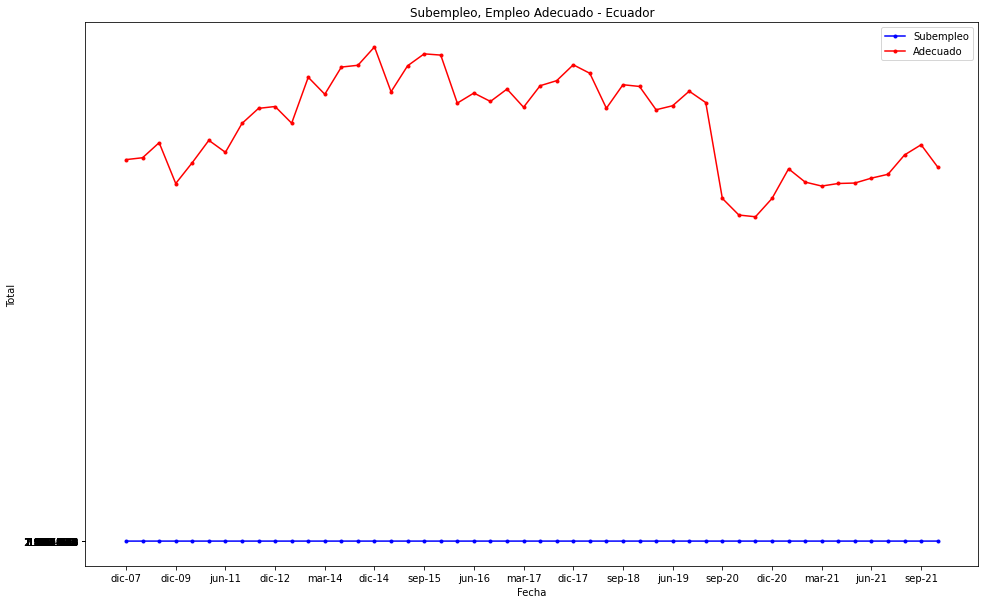

In [638]:
plt.figure(figsize=(16, 10))
plt.title('Subempleo, Empleo Adecuado - Ecuador')
plt.plot(finalMerge.Fecha, finalMerge.Subempleo, 'b.-')
plt.plot(finalMerge.Fecha, finalMerge.Adecuado, 'r.-')
plt.xticks(finalMerge.Fecha[::3].tolist())
plt.xlabel('Fecha')
plt.ylabel('Total')
plt.legend(['Subempleo','Adecuado'])
plt.show()

# Conclusiones
Es importante realizar una buena limpieza de datos